In [1]:
import numpy as np 
import pandas as pd 

In [2]:
covid_de = pd.read_csv('data/covid_de.csv')
covid_de['date'] = pd.to_datetime(covid_de['date'])
demographics = pd.read_csv('data/demographics_de.csv')

# **Basic information**

In [3]:
covid_de.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-04-05,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,M,2020-05-18,1,0,1


In [4]:
print('Shape of dataset (num_rows, num_columns): ', covid_de.shape)
print('\n')
print('The date range of the data is: ', covid_de.date.min().strftime('%d.%m.%Y'), '-', covid_de.date.max().strftime('%d.%m.%Y'))
print('\n')
print('Dataset info.')
covid_de.info()
covid_de.describe()

Shape of dataset (num_rows, num_columns):  (106454, 8)


The date range of the data is:  28.01.2020 - 15.08.2020


Dataset info.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106454 entries, 0 to 106453
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   state      106454 non-null  object        
 1   county     106454 non-null  object        
 2   age_group  106336 non-null  object        
 3   gender     106066 non-null  object        
 4   date       106454 non-null  datetime64[ns]
 5   cases      106454 non-null  int64         
 6   deaths     106454 non-null  int64         
 7   recovered  106454 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 6.5+ MB


,cases,deaths,recovered
count,106454.000000,106454.000000,106454.000000
mean,2.099019,0.086714,1.890535
std,2.644541,0.376682,2.613749
min,1.000000,0.000000,-1.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,2.000000,0.000000,2.000000
max,207.000000,11.000000,207.000000


In [5]:
print('Columns with missing values:')
missing_val_count_by_column = (covid_de.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Columns with missing values:
age_group    118
gender       388
dtype: int64


In [6]:
#fill age_group Na's with the most frequent value
most_freq_age = covid_de.age_group.value_counts().idxmax()
print('Most frequent age group: ', most_freq_age)
covid_de.age_group.fillna(most_freq_age, inplace=True)

#for gender missing values, we fill half of it with 'M' and half with 'F'
mask = covid_de.gender.isna() 
ind = covid_de.gender.loc[mask].sample(frac=0.5).index
covid_de.loc[ind, 'gender'] = 'M'
covid_de.gender.fillna('F', inplace=True)

Most frequent age group:  35-59


In [7]:
demographics.head()

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


# Data Analysis

First, let's see how the number of infected people varied over time.

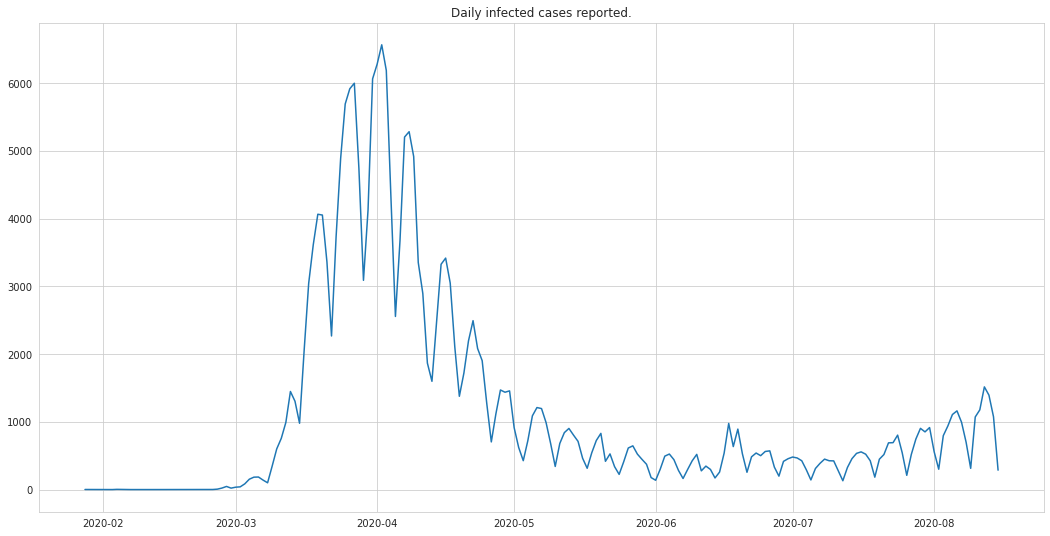

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec


covid_by_date = covid_de.groupby('date').sum()
#covid_by_date.sort_index(ascending=False, inplace=True)
#covid_by_date

sns.set_style("whitegrid")
plt.figure(figsize=(18,9))
plt.title('Daily infected cases reported.')
p=sns.lineplot(data=covid_by_date['cases'])

**We can see that the peak of infections was around April 2020. Also, unfortunately, the number of daily infections seems to be increasing slowly nowadays (August 2020).**

Let's see the deaths rate..

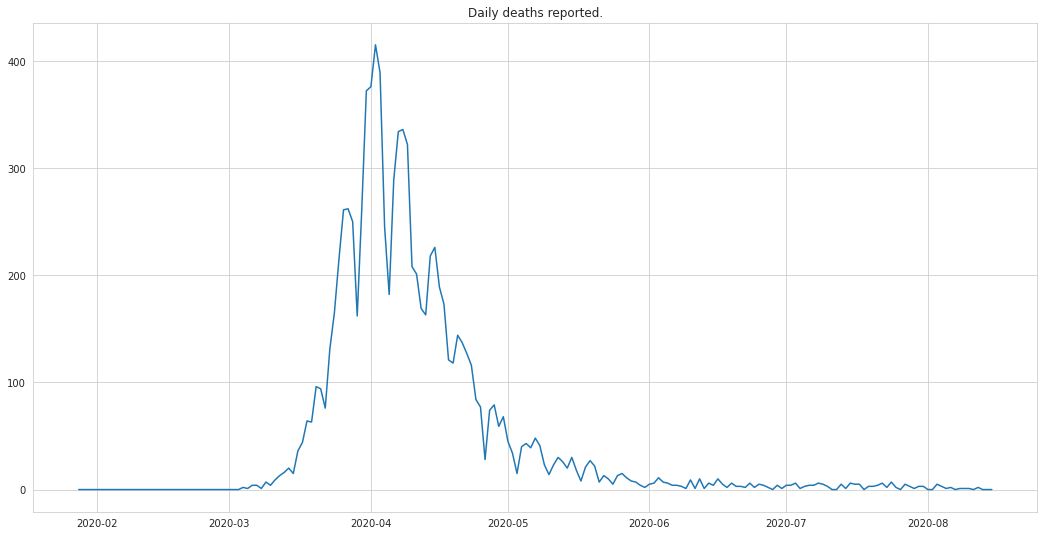

In [9]:
plt.figure(figsize=(18,9))
plt.title('Daily deaths reported.')
p=sns.lineplot(data=covid_by_date['deaths'])

**Again, the peak of deaths was around April 2020. But luckily, there is no increase in deaths in the recent days even though there is a surge in the number of new infections.**

# States Comparison

Let's see which states had the most cases so far..

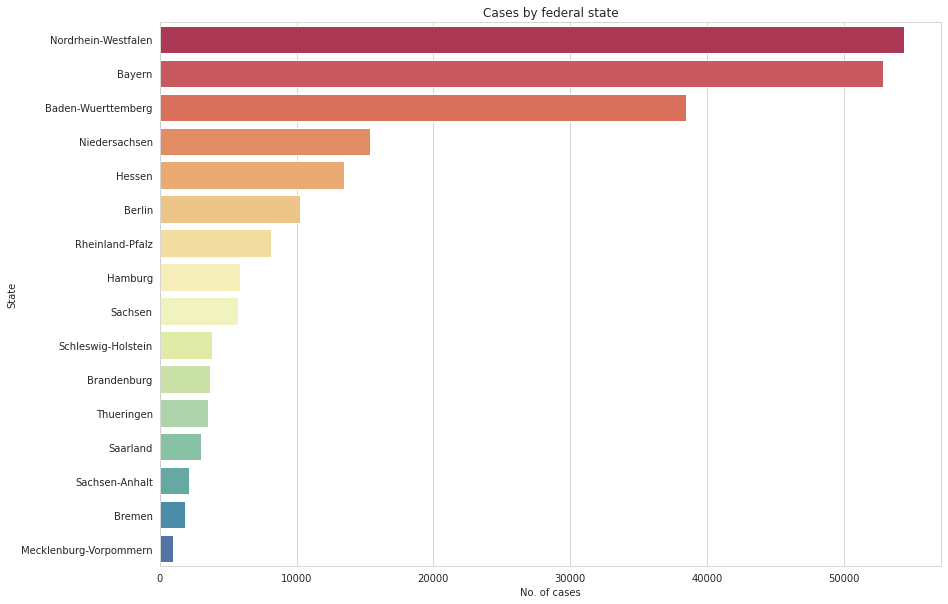

In [10]:
covid_by_state = covid_de.groupby('state').sum()
covid_by_state.sort_values('cases', ascending=False, inplace=True)

plt.figure(figsize=(14,10))
sns.barplot(covid_by_state.cases, covid_by_state.index, palette='Spectral');
plt.title("Cases by federal state")
plt.xlabel("No. of cases")
p=plt.ylabel("State")

**We see that the states with the most number of total cases overall are: Nordrhein Wesfalen, Bayern, and Baden Wurttemberg.**

***But let's see if these rates are different now (last month) than those during the peak time around April? maybe some states learned the lesson and are being more cautious now.***

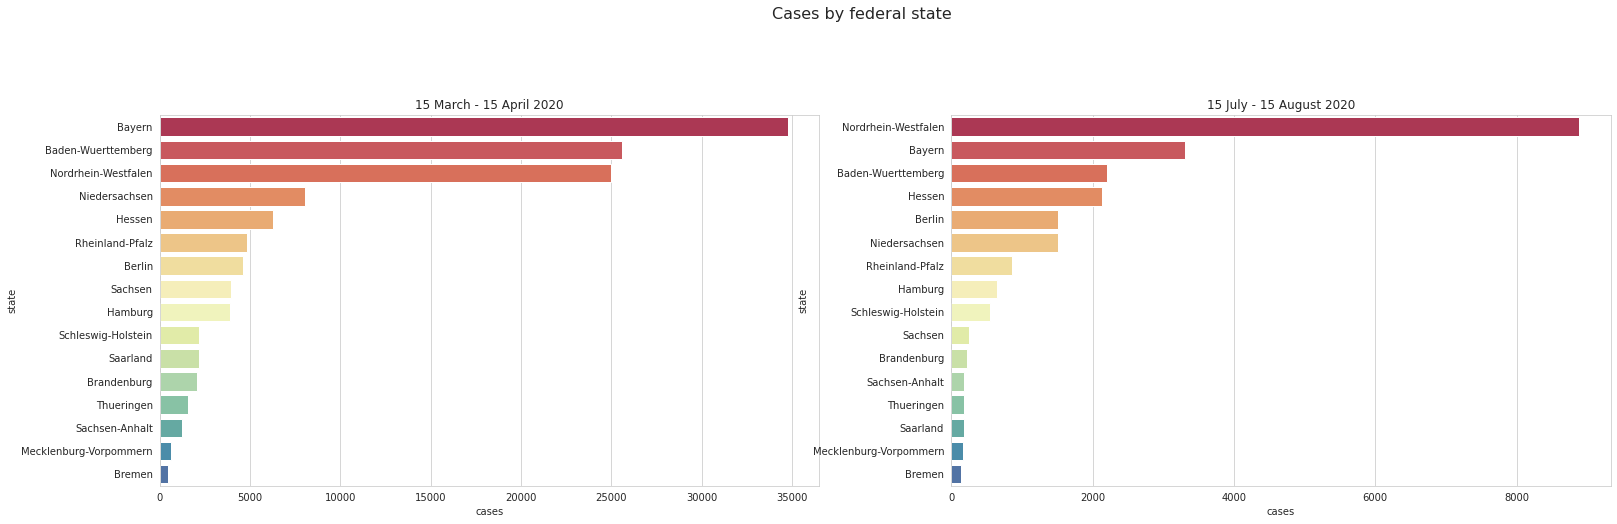

In [11]:
mask = (covid_de['date'] > '2020-3-15') & (covid_de['date'] <= '2020-4-15')
covid_masked_old = covid_de.loc[mask]
mask = (covid_de['date'] > '2020-7-15') & (covid_de['date'] <= '2020-8-15')
covid_masked_recent = covid_de.loc[mask]

covid_by_state_old = covid_masked_old.groupby('state').sum()
covid_by_state_old.sort_values('cases', ascending=False, inplace=True)
covid_by_state_recent = covid_masked_recent.groupby('state').sum()
covid_by_state_recent.sort_values('cases', ascending=False, inplace=True)

plt.figure(figsize=(26,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0],  title='15 March - 15 April 2020')
sns.barplot(x=covid_by_state_old.cases, y=covid_by_state_old.index, palette='Spectral')
plt.subplot(the_grid[0, 1], title='15 July - 15 August 2020')
sns.barplot(x=covid_by_state_recent.cases, y=covid_by_state_recent.index, palette='Spectral')
p=plt.suptitle('Cases by federal state', fontsize=16)


**The top 3 states are the same but with different order and different numbers. Nordrhein Westfalen has the most number of cases recently and with a big distance from the second state (Bayern).**

**But comparing plain numbers like this might be misleading, since every state has different population, and it is expected that big states will have higher number of cases than smaller states. So, let's consider the ratio of cases to the population of each state to get a more fair comparison.**

In [12]:
states_population = demographics.groupby('state').sum().sort_values('population', ascending=False)

states_population

,population
state,
Nordrhein-Westfalen,17932651
Bayern,13076721
Baden-Wuerttemberg,11069533
Niedersachsen,7982448
Hessen,6265809
Rheinland-Pfalz,4084844
Sachsen,4077937
Berlin,3644826
Schleswig-Holstein,2896712


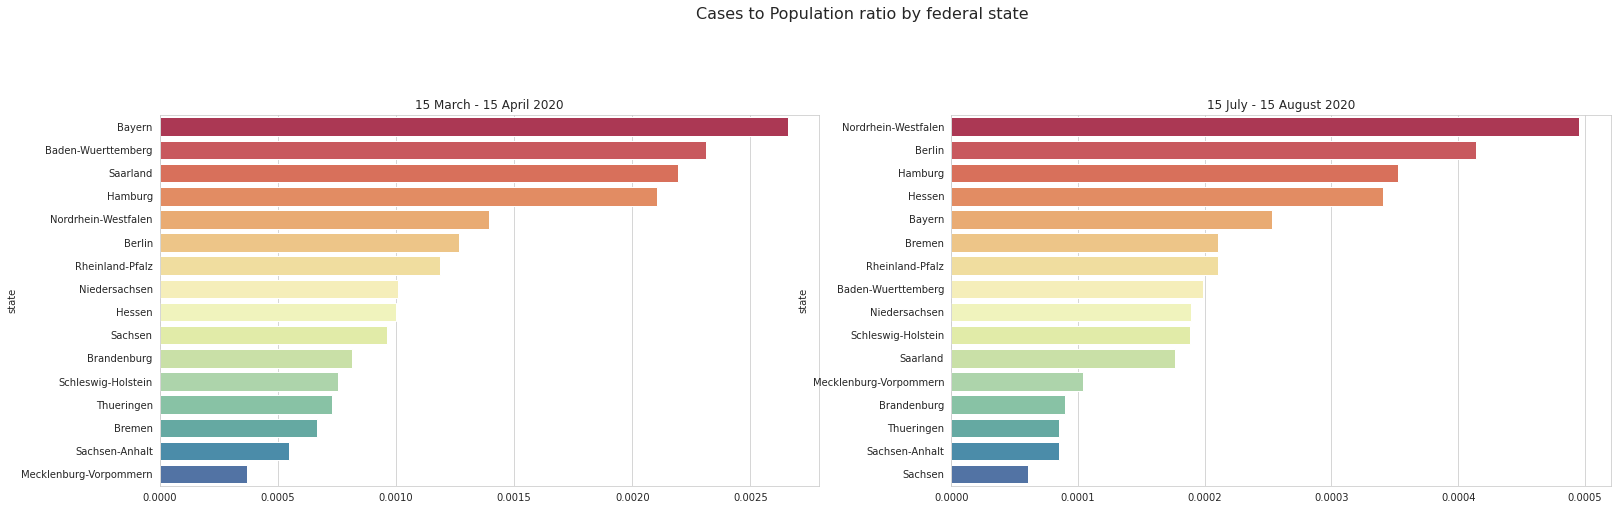

In [19]:
covid_old_ratio = covid_by_state_old.cases / states_population.loc[covid_by_state_old.index].population
covid_old_ratio.sort_values(ascending=False, inplace=True)

covid_recent_ratio = covid_by_state_recent.cases / states_population.loc[covid_by_state_recent.index].population
covid_recent_ratio.sort_values(ascending=False, inplace=True)


plt.figure(figsize=(26,15))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0],  title='15 March - 15 April 2020')
sns.barplot(x=covid_old_ratio, y=covid_old_ratio.index, palette='Spectral')
plt.subplot(the_grid[0, 1], title='15 July - 15 August 2020')
sns.barplot(x=covid_recent_ratio, y=covid_recent_ratio.index, palette='Spectral')
p=plt.suptitle('Cases to Population ratio by federal state', fontsize=16)


**Now we have a different story as comppared to the previous plot. First, we see that some small states that were in the tail of the previous plot (number of cases) are now at the top of the current plot (meaning that they have a big ratio of infections as compared to their population). For example, we see Saarland at the third position in the current plot in the peak time around April 2020. Similarly, we see Hamburg has high ratio of infections while its population is amongst the lowest compared to other states. However, it would be unfair to judge the people in these states of being careless as these are densly populated states, and it is expected to have higher rates of infections in more densly populated areas. Unfortunately, the population density information is not available in the current datasets.**

**We observe that a state such as Baden Wurttemberg has better statistics now as compared to the peak of the crisis in April. The state has moved from the second highest infection ratio in April to the 8th position. Similarly, Saarland has lower ratio now as compared to April.**

# Age groups# 

Next, let's see which age group is affected the most by the virus. 

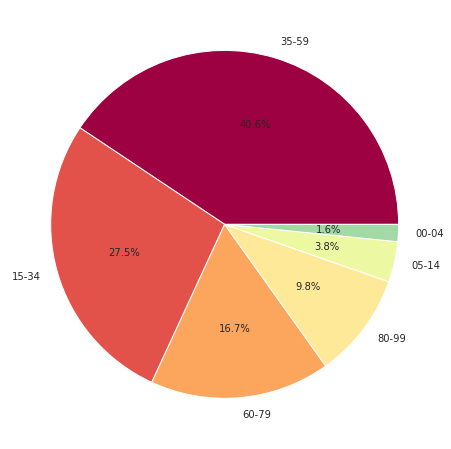

In [14]:
covid_by_age = covid_de.groupby('age_group').sum()
covid_by_age.sort_values('cases', ascending=False, inplace=True)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(8,8))
cases_pie = plt.pie(covid_by_age.cases, labels=covid_by_age.index, autopct='%1.1f%%', shadow=False, colors=colors)

Now let's see if the death rates are following the same distribution as infections. To visualize the deaths we measure the ratio of deaths to number of cases for each age group individually (i.e. for each age group, how many of those infected by the virus ended up dead).

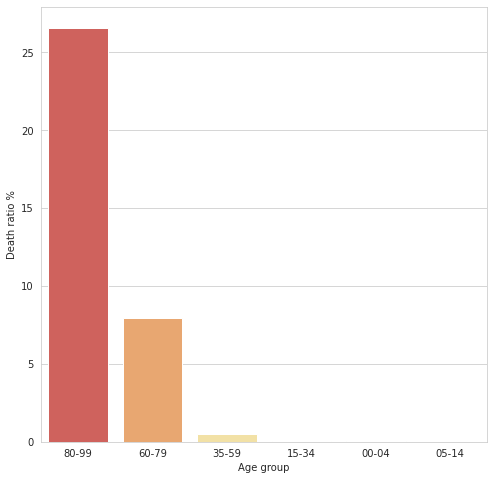

In [15]:
deaths_ratio = covid_by_age.deaths / covid_by_age.cases * 100.0
covid_by_age['death_ratio'] = deaths_ratio
covid_by_age.sort_values('death_ratio', ascending=False, inplace=True)

plt.figure(figsize=(8,8))
death_pie = sns.barplot(y=covid_by_age.death_ratio, x=covid_by_age.index, palette='Spectral')
p=plt.xlabel('Age group')
p=plt.ylabel('Death ratio %')

**Even though the age groups 35-59 and 15-34 are the most infected group by the virus, the people in the age group 60-99 are more likely to die if they got the infection. More than 25% of the infected people in the age group 80-99 died from the virus. This should not come as a surprise for us now as it was one of the first observations that were reported about covid-19.**

# Gender

Let's see if one gender is afected more by the virus or not.

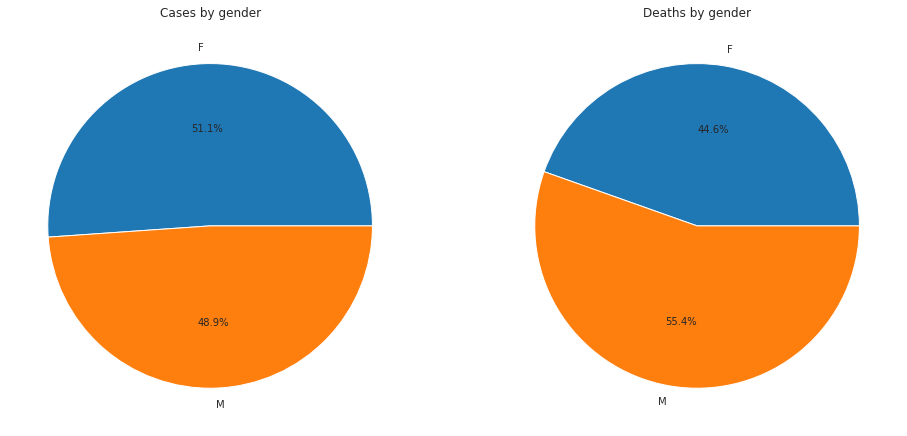

In [16]:
covid_by_gender = covid_de.groupby('gender').sum()
covid_by_gender.sort_values('cases', ascending=False, inplace=True)

plt.figure(figsize=(16,20))
plt.subplot(the_grid[0, 0], aspect=1, title='Cases by gender')
cases_pie = plt.pie(covid_by_gender.cases, labels=covid_by_gender.index, autopct='%1.1f%%')


plt.subplot(the_grid[0, 1], aspect=1, title='Deaths by gender')
death_pie = plt.pie(covid_by_gender.deaths, labels=covid_by_gender.index, autopct='%1.1f%%')

Seems like the virus does not descriminate between men and women in infection. Covid-19 is not sexist :D

But the death ratio seems to be slightly higher for males. Let's zoom on the deaths numbers and see how it is distributed over different age groups.

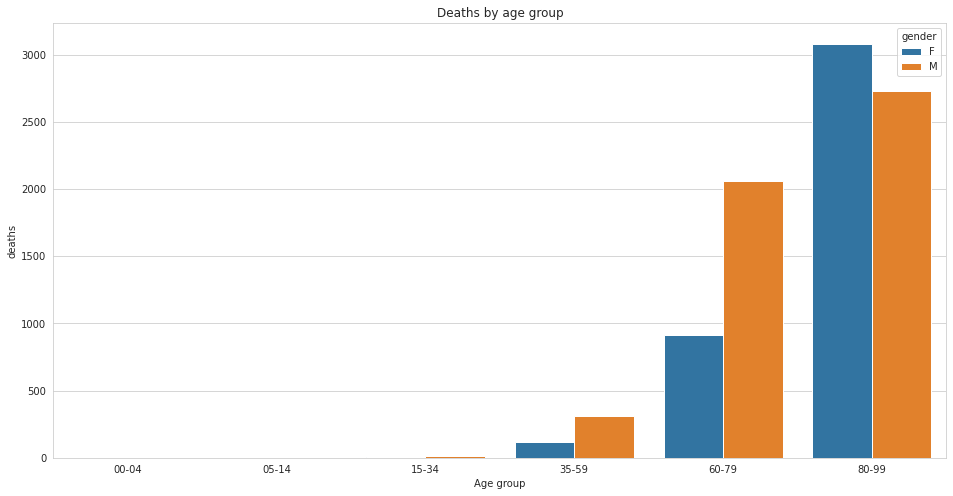

In [17]:
covid_by_sg = covid_de.groupby(['age_group', 'gender'],as_index=False).sum()
#covid_by_sg

plt.figure(figsize=(16,8))
p = sns.barplot(y=covid_by_sg.deaths, x=covid_by_sg.age_group, hue=covid_by_sg.gender, data=covid_by_sg);
#plt.xticks(rotation=-45)
p=plt.title("Deaths by age group")
p=plt.ylabel("deaths")
p=plt.xlabel("Age group")

The dead cases for females in the age group 80-99 are more than males. Other than that, the males seems to have higher mortality rate in other age groups. That's a peculiar observation but we cannot interpret it as it needs the opinions of specialists.